<img src="logo.jpg" />

## [Prof. Pedram Jahangiry](https://huntsman.usu.edu/directory/jahangiry-pedram) 
[GitHub account](https://github.com/PJalgotrader) 

[YouTube Channel](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ/playlists) 

# K-Nearest Neigbors (KNN) - Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [3]:
rand_state = 1000

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [7]:
# first we look at target variable proportions:
pd.crosstab(df['Purchased'],df['Purchased'], normalize='all')*100

Purchased,0,1
Purchased,,
0,64.25,0.00
1,0.00,35.75


It seems that the target variable is relatively balanced! this is good news for our performance metrics specially the accuracy and ROC!

## Data preprocessing 

In [8]:
df.isna().sum()  


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.drop('User ID',axis=1, inplace=True)

In [10]:
df = pd.get_dummies(df, drop_first=True)

In [11]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [13]:
df = df[['Purchased','Age', 'EstimatedSalary', 'Gender_Male']]

In [14]:
df.head()

,Purchased,Age,EstimatedSalary,Gender_Male
0,0,19,19000,1
1,0,35,20000,1
2,0,26,43000,0
3,0,27,57000,0
4,0,19,76000,1


In [15]:
df.describe()

,Purchased,Age,EstimatedSalary,Gender_Male
count,400.000000,400.000000,400.000000,400.000000
mean,0.357500,37.655000,69742.500000,0.490000
std,0.479864,10.482877,34096.960282,0.500526
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


## Data visualization 

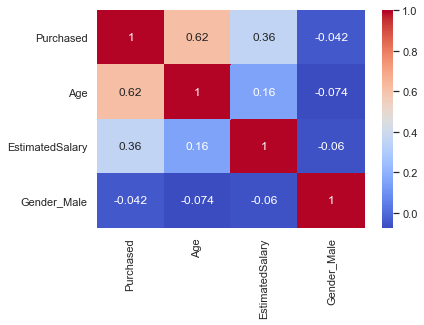

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True, yticklabels=True)
plt.show()

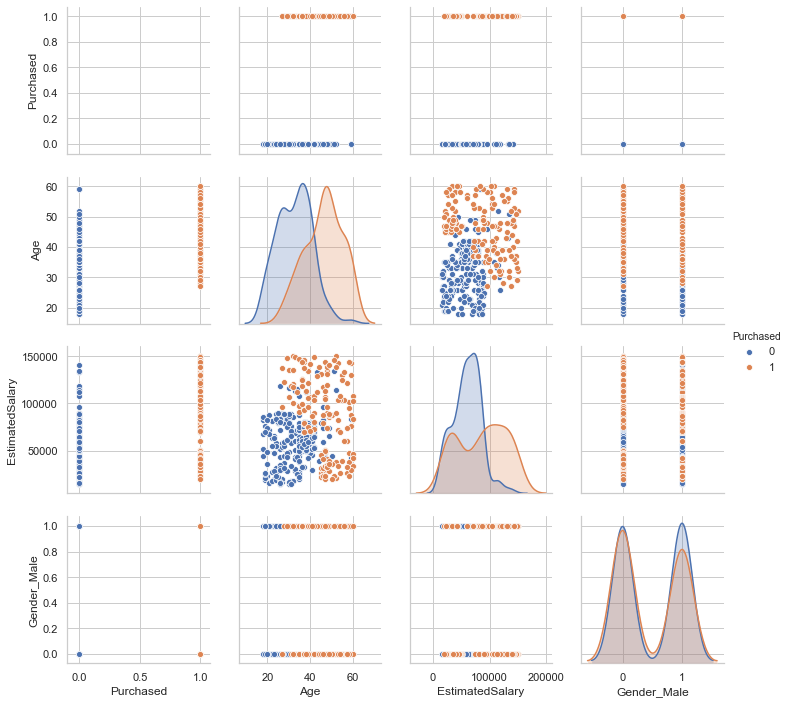

In [17]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Purchased')

## Scaling the features: 

The following step is very important for **Classification** specially for KNN. Because any variable on the larger scale, has a larger effect on the distance between observations. 

In general we need to rescale our variables. If we don't rescale the salary in this example, then the model may always return T or F. 

In this data set, because Male and Purchased are dummy variables, we don't need to standardize it! 

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)

In [19]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,Purchased,Age,EstimatedSalary,Gender_Male
0,-0.745936,-1.781797,-1.490046,1.020204
1,-0.745936,-0.253587,-1.460681,1.020204
2,-0.745936,-1.113206,-0.785290,-0.980196
3,-0.745936,-1.017692,-0.374182,-0.980196
4,-0.745936,-1.781797,0.183751,1.020204


In [20]:
df_sc['Gender_Male']=df['Gender_Male']
df_sc['Purchased']=df['Purchased']
df_sc.head(3)

,Purchased,Age,EstimatedSalary,Gender_Male
0,0,-1.781797,-1.490046,1
1,0,-0.253587,-1.460681,1
2,0,-1.113206,-0.785290,0


### Defining the variables and splitting the data

In [22]:
y = df_sc['Purchased']
X = df_sc.drop('Purchased', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [23]:
X_train.head()

,Age,EstimatedSalary,Gender_Male
269,0.223978,-0.256722,1
389,0.988083,-1.020209,0
232,0.223978,1.094061,1
89,-0.253587,-0.579736,1
236,0.223978,-0.374182,1


##  KNN Classification with Sklearn

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# Fitting KNN classifier to the Training set

KNN_classifier = KNeighborsClassifier(n_neighbors=5)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

Minkowski distance: https://en.wikipedia.org/wiki/Minkowski_distance

In [26]:
# Predicting the Test set probabilities and classes
y_hat      = KNN_classifier.predict(X_test)
y_hat_probs = KNN_classifier.predict_proba(X_test)[:,1] 
# predicted probabilities are reported for both classes. we saved the prob of purchased!

In [27]:
np.round(KNN_classifier.predict_proba(X_test),3)[:5]

array([[0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ]])

Let's look at the histogram of probabilities of default:

In [28]:
np.max(y_hat_probs)

1.0

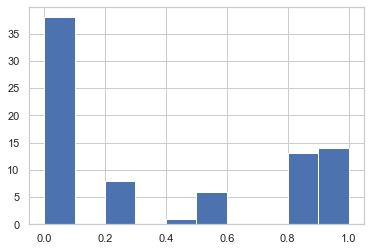

In [29]:
plt.hist(y_hat_probs)
plt.show()

As we saw earlier, the data set is relatively balanced and it seems that a probability threshold of 0.5 if a fair number to work with. However, we are going to construct predictions for threshold =0.3 (to avoid too many false negatives) and 0.7 (to avoid too many false positives) as well. 

**Exercise:** For this social network ads data set, which threshold would make more sense? 

In [30]:
y_hat_30 = np.where(y_hat_probs>0.3,1,0)
y_hat_70 = np.where(y_hat_probs>0.7,1,0)

In [31]:
# let's put all the predictions together in a data frame.
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_probs':y_hat_probs,
                               'y_hat_30':y_hat_30, 'y_hat_70':y_hat_70})
df_predictions.head()

,y_test,y_hat_probs,y_hat_30,y_hat_70
220,0,0.2,0,0
4,0,0.0,0,0
230,1,1.0,1,1
55,0,0.0,0,0
312,0,0.0,0,0


----

## Performance metrics:

In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#### Confusion matrix

In [33]:
print(confusion_matrix(y_test, y_hat))

[[44  4]
 [ 3 29]]


#### Built-in classification report

In [34]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        48
           1       0.88      0.91      0.89        32

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



### Defining my own KNN report:

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



def my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5):
    knn= KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    probs = knn.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")
    return cm_labled
 

In [46]:
my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5)

-----------------------------------------
Accuracy  = 0.9125
Error_rate  = 0.0875
Precision = 0.88
Recall    = 0.91
f1_score  = 0.89
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,44,4
Actual : positive,3,29


**Exercise**: What will happen to my_KNN_report outputs if threshold=0.3? What about 0.7? 

In [34]:
X_train.shape

(320, 3)

**Exercise**: Now try K=320 (train size). Why all the predictions are negative?

### ROC and AUC 

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.935


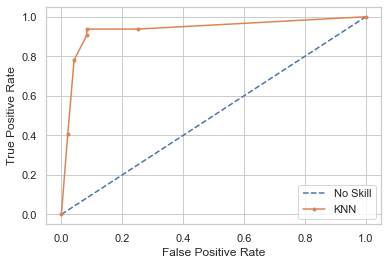

In [45]:
# generate a no skill (ns) prediction and KNN  (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = KNN_classifier.predict_proba(X_test)[:,1]
# calculating scores for no skill and KNN 
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Exercise**: Are you excited about the high AUC? why?

---

##  Cross validation

In KNN, we use cross validation to find the optimal value of K. 

In [47]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [48]:
# remember we saved our model in an object called "KNN_classifier"
accuracy = cross_val_score(estimator = KNN_classifier, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

In [49]:
1-accuracy

array([0.078125, 0.109375, 0.0625  , 0.109375, 0.09375 ])

In [50]:
error_rate=round((1-accuracy).mean(),4)
error_rate

0.0906

----------------

## Choosing K
 
Let's start with a simple error rate approach in the test set.

In [55]:
error_rate = []
k=50

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    error_rate.append(np.mean(y_test != KNN_i.predict(X_test)) )


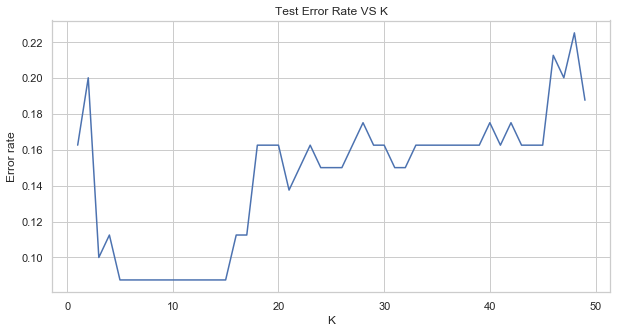

In [56]:
plt.figure(figsize=(10,5))
sns.lineplot(y=error_rate, x=range(1,k))
plt.title('Test Error Rate VS K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

**exercise**: What is wrong if we rely on the error rate in the test set and choose k=6?

cheating!

In [57]:
error_rate_test = []
error_rate_CV=[]
k=50

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    accuracy =  cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 5 , scoring="accuracy")
    error_rate_CV.append(np.mean(1-accuracy))
    error_rate_test.append(np.mean(y_test != KNN_i.predict(X_test)) )
    
optimal_k = pd.DataFrame({'error_rate_CV': error_rate_CV, 'error_rate_test':error_rate_test}, index=range(1,k))

In [58]:
optimal_k.head(10)

,error_rate_CV,error_rate_test
1,0.121875,0.1625
2,0.125000,0.2000
3,0.106250,0.1000
4,0.106250,0.1125
5,0.090625,0.0875
6,0.090625,0.0875
7,0.090625,0.0875
8,0.087500,0.0875
9,0.084375,0.0875
10,0.093750,0.0875


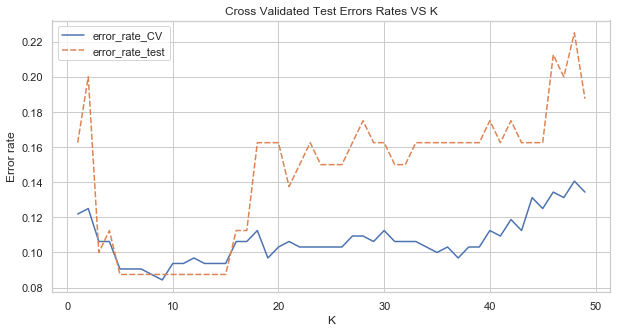

In [59]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k)
plt.title('Cross Validated Test Errors Rates VS K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

**exercise:** By looking at this graph, What is the optimal value for K now?

Refit the model using the optimal K. 

In [45]:
my_KNN_report(X_train, y_train, X_test,y_test, K=9, threshold=0.5)

-----------------------------------------
Accuracy  = 0.9125
Error_rate  = 0.0875
Precision = 0.88
Recall    = 0.91
f1_score  = 0.89
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,44,4
Actual : positive,3,29


---
### Advance Visualization (this part is optional) 

Visualising the Training set results (in 2D of course!). We have to rerun the whole model with 2 explanatory variables

In [60]:
X= df[['Age', 'EstimatedSalary']]
y= df[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [62]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

## Fitting KNN classifier to the Training set

In [69]:

KNN_classifier = KNeighborsClassifier(n_neighbors=1)
KNN_classifier.fit(X_train, y_train.values.reshape(-1,))

KNeighborsClassifier(n_neighbors=1)

In [70]:
# Predicting the Test set results
y_pred = KNN_classifier.predict(X_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


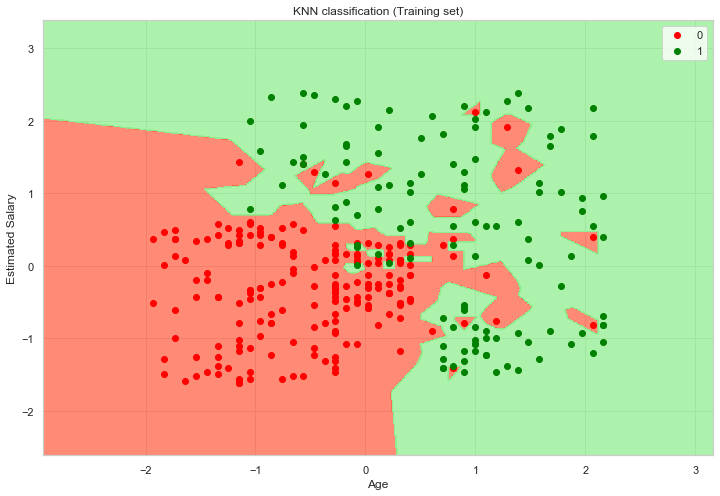

In [71]:
# visualization
plt.figure(figsize=(12,8))

X_set, y_set = X_train, y_train.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


from matplotlib.colors import ListedColormap
plt.contourf( X1, X2 , KNN_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


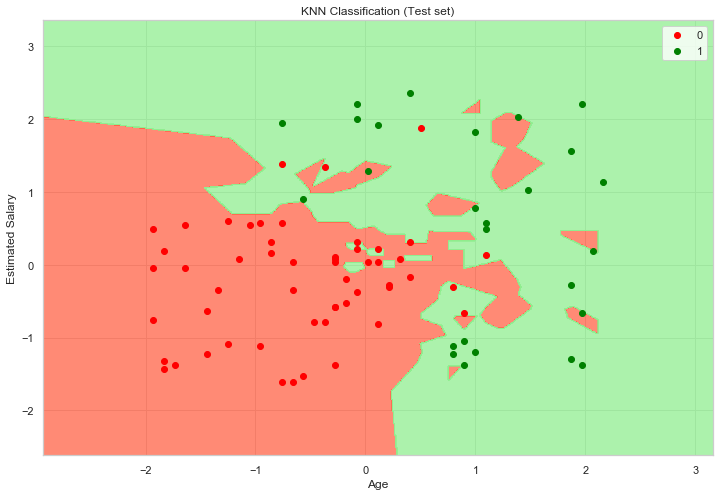

In [72]:
plt.figure(figsize=(12,8))

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, KNN_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [68]:
print(confusion_matrix(y_test, y_pred))

[[49  5]
 [ 0 26]]


**FUN exercise**: now try k=1 and k=300 in the visualization part. Interpret what you observe!

For K=1, what is the accuracy in the train set?

###  Additional links:
1. Minkowski distance: https://en.wikipedia.org/wiki/Minkowski_distance
2. Is accuracy everything? https://towardsdatascience.com/is-accuracy-everything-96da9afd540d
3. micro, macro, weighted average in classification report: https://stackoverflow.com/questions/55740220/macro-vs-micro-vs-weighted-vs-samples-f1-score
4. ROC Curves and Precision-Recall Curves for Imbalanced Classification: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/
